In [1]:
import pandas as pd
import numpy as np
import re

# Pre Process

In [2]:
with open("data/hp_en.txt", "r") as f:
    hp_en = f.read()
    
with open("data/hp_fa.txt", "r") as f:
    hp_fa = f.read()

In [3]:
hp_en_no_space = re.sub(r'\s+', ' ', hp_en).strip()
hp_fa_no_space = re.sub(r'\s+', ' ', hp_fa).strip()

In [4]:
from hazm import Normalizer, SentenceTokenizer

sentence_tokenizer = SentenceTokenizer()

sentences_en = sentence_tokenizer.tokenize(hp_en_no_space)
sentences_fa = sentence_tokenizer.tokenize(hp_fa_no_space)


In [5]:
sentences_fa

['\ufeffآقا و خانم دورسلي ساکن خانه شماره چهار خيابان پريوت درايو بودند.',
 'خانواده آنها بسيار معمولي و عادي بود و آن ها از اين بابت بسيار راضي و خوشنود بودند.',
 'اين خانواده به هيچ وجه با امور مرموز و اسرار آميز سروکار نداشتند زيرا سحر و جادو را امر مهمل و بيهوده اي مي پنداشتند و علاقه اي به اين گونه مسائل نداشت ن آقاي دورسلي مدير شرکت دريل سازي گرونينگز ، مردي درشت اندام و قوي هيکل بود با گردني بسيار کوتاه که سبيل بلندي نيز داشت .',
 'همسر او، خانم دورسلي زني لاغر اندام بود با موهاي بور و گردني کشيده و بلند.',
 'بلندي گردنش بسيار برايش مفيد بود زيرا بيش تر وقتش را صرف سرک کشيدن به خانه ي همسايه ها مي کرد.',
 'آنها پسري داشتند به نام دادلي که به عقيده خودشان لنگه نداشت .',
 'آنها خانواده ي مرفهي بودند و هيچ کم و کسري نداشتند اما در اين خانواده رازي وجود داشت که نبايد برملا مي شد.',
 'آن ها هميشه در هول و هراس بودند که مبادا روزي کسي به رازشان پي ببرد.',
 'حتي تصور اين که کسي از خانواده ي پاتر چيزي بداند برايشان غيرقابل تحمل بود.',
 'خانم پاتر خواهر خانم دورسلي بود اما سال ها بود که 

In [6]:

normalizer = Normalizer()


normalized_sentences_en = [normalizer.normalize(sentence) for sentence in sentences_en]
normalized_sentences_fa = [normalizer.normalize(sentence) for sentence in sentences_fa]


In [7]:
normalized_sentences_en

['\ufeff.',
 'http: / / www. google. com CHAPTER ONE THE BOY WHO LIVED Mr.',
 'and Mrs.',
 'Dursley, of number four (۴) , Privet Drive, were proud to say that they were perfectly normal, thank you very much.',
 "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
 '۳۳ Mr.',
 'Dursley was the director of a firm called Grunnings, which made drills.',
 'He was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'Mrs.',
 'Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 '۶۶ The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
 "They didn't think they cou

In [8]:
words_en = [sentence.split(" ") for sentence in normalized_sentences_en]
words_fa = [sentence.split(" ") for sentence in normalized_sentences_fa]

In [9]:
words_fa[110]

['همچنان',
 'مصمم',
 'بود',
 'که',
 'از',
 'ماجرای',
 'آن',
 'روز',
 'به',
 'همسرش',
 'چیزی',
 'نگوید.']

In [10]:
sents_no_punctuation_en = []
sents_no_punctuation_fa = []
for sent in words_fa:
    sent_arr = []
    for word in sent:
        sent_arr.append(normalizer.remove_specials_chars(word))
    sents_no_punctuation_fa.append(sent_arr)

for sent in words_en:
    sent_arr = []
    for word in sent:
        sent_arr.append(normalizer.remove_specials_chars(word))
    sents_no_punctuation_en.append(sent_arr)
        

In [11]:
sents_no_punctuation_en[110]

['He',
 'hurried',
 'to',
 'his',
 'car',
 'and',
 'set',
 'off',
 'for',
 'home,',
 'hoping',
 'he',
 'was',
 'imagining',
 'things,',
 'which',
 'he',
 'had',
 'never',
 'hoped',
 'before,',
 'because',
 'he',
 "didn't",
 'approve',
 'of',
 'imagination.']

In [12]:
# so it seems that the prev approach is not working
sents_without_punctuation_fa = [re.sub(r'[^\w\s]', '', sentence) for sentence in normalized_sentences_fa]
sents_without_punctuation_en = [re.sub(r'[^\w\s]', '', sentence) for sentence in normalized_sentences_en]

In [13]:
sents_without_punctuation_en

['',
 'http   www google com CHAPTER ONE THE BOY WHO LIVED Mr',
 'and Mrs',
 'Dursley of number four ۴  Privet Drive were proud to say that they were perfectly normal thank you very much',
 'They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense',
 '۳۳ Mr',
 'Dursley was the director of a firm called Grunnings which made drills',
 'He was a big beefy man with hardly any neck although he did have a very large mustache',
 'Mrs',
 'Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors',
 'The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere',
 '۶۶ The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it',
 'They didnt think they could bear it if anyone found out about the

In [14]:
def remove_emoji(text):
    emoji_pattern = re.compile("[" 
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" # symbols & pictographs
        u"\U0001F680-\U0001F6FF" # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

sents_no_emji_fa = [remove_emoji(sentence) for sentence in sents_without_punctuation_fa]
sents_no_emji_en = [remove_emoji(sentence) for sentence in sents_without_punctuation_en]

In [15]:
sents_no_emji_en

['',
 'http   www google com CHAPTER ONE THE BOY WHO LIVED Mr',
 'and Mrs',
 'Dursley of number four ۴  Privet Drive were proud to say that they were perfectly normal thank you very much',
 'They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense',
 '۳۳ Mr',
 'Dursley was the director of a firm called Grunnings which made drills',
 'He was a big beefy man with hardly any neck although he did have a very large mustache',
 'Mrs',
 'Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors',
 'The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere',
 '۶۶ The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it',
 'They didnt think they could bear it if anyone found out about the

In [16]:
sents_no_emji_fa

['آقا و خانم دورسلی ساکن خانه شماره چهار خیابان پریوت درایو بودند',
 'خانواده آنها بسیار معمولی و عادی بود و آنها از این بابت بسیار راضی و خوشنود بودند',
 'این خانواده به هیچ وجه با امور مرموز و اسرار آمیز سروکار نداشتند زیرا سحر و جادو را امر مهمل و بیهودهای میپنداشتند و علاقهای به اینگونه مسائل نداشت ن آقای دورسلی مدیر شرکت دریل سازی گرونینگز مردی درشتاندام و قوی هیکل بود با گردنی بسیار کوتاه که سبیل بلندی نیز داشت',
 'همسر او خانم دورسلی زنی لاغر اندام بود با موهای بور و گردنی کشیده و بلند',
 'بلندی گردنش بسیار برایش مفید بود زیرا بیشتر وقتش را صرف سرک کشیدن به خانهی همسایهها میکرد',
 'آنها پسری داشتند به نام دادلی که به عقیده خودشان لنگه نداشت',
 'آنها خانوادهی مرفهی بودند و هیچ کم و کسری نداشتند اما در این خانواده رازی وجود داشت که نباید برملا میشد',
 'آنها همیشه در هول و هراس بودند که مبادا روزی کسی به رازشان پی ببرد',
 'حتی تصور اینکه کسی از خانوادهی پاتر چیزی بداند برایشان غیرقابل تحمل بود',
 'خانم پاتر خواهر خانم دورسلی بود اما سالها بود که یکدیگر را ندیده بودند',
 'در واقع خا

In [17]:
from hazm import Lemmatizer, word_tokenize

normalized_fa = normalizer.normalize(hp_fa)
tokenized_fa = [word_tokenize(sentence) for sentence in sents_no_emji_fa]

In [18]:
lemmatizer = Lemmatizer()

lemmas = []
for sentence in tokenized_fa:
    arr = []
    for token in sentence:
        arr.append(lemmatizer.lemmatize(token))
    lemmas.append(arr)

In [19]:
type(lemmas[0])

list

In [20]:
sents_lower_en = [sentence.lower() for sentence in sentences_en]

In [ ]:
sents_lower_en

In [22]:
tokenized_lower_en = [word_tokenize(sentence) for sentence in sents_lower_en]

In [23]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_urls(text):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)

In [24]:
no_num_url_en = [remove_numbers(remove_urls(sentence)) for sentence in sents_lower_en]

In [25]:
no_num_url_en

['\ufeff.',
 ' chapter one the boy who lived mr.',
 'and mrs.',
 'dursley, of number four (), privet drive, were proud to say that they were perfectly normal, thank you very much.',
 "they were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
 ' mr.',
 'dursley was the director of a firm called grunnings, which made drills.',
 'he was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'mrs.',
 'dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere.',
 ' the dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
 "they didn't think they could bear it if anyone found out a

In [26]:
no_num_url_punc_en = [re.sub(r'[^\w\s]', '', sentence) for sentence in no_num_url_en]

In [27]:
no_num_url_punc_en

['',
 ' chapter one the boy who lived mr',
 'and mrs',
 'dursley of number four  privet drive were proud to say that they were perfectly normal thank you very much',
 'they were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense',
 ' mr',
 'dursley was the director of a firm called grunnings which made drills',
 'he was a big beefy man with hardly any neck although he did have a very large mustache',
 'mrs',
 'dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors',
 'the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere',
 ' the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it',
 'they didnt think they could bear it if anyone found out about the potters',
 'mrs',
 'potter

# WordCloud

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:
no_num_url_punc_text_en = " ".join(no_num_url_punc_en)

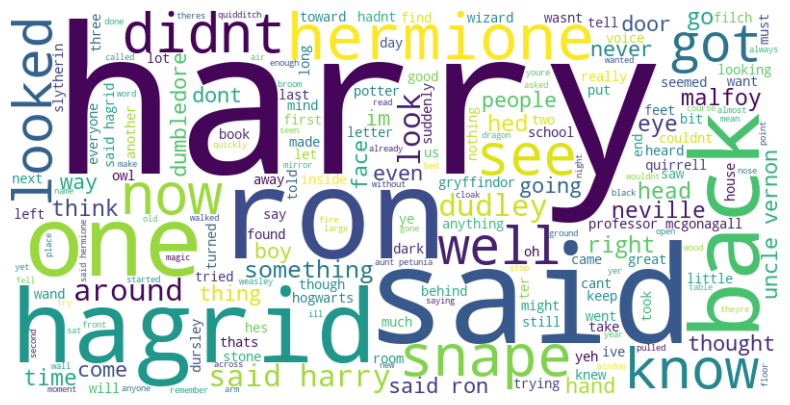

In [30]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(no_num_url_punc_text_en)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# word to num

In [31]:
def words_to_numbers(text:str):
    units = {
        'صفر': 0, 'یک': 1, 'دو': 2, 'سه': 3, 'چهار': 4, 'پنج': 5,
        'شش': 6, 'هفت': 7, 'هشت': 8, 'نه': 9, 'ده': 10, 'یازده': 11,
        'دوازده': 12, 'سیزده': 13, 'چهارده': 14, 'پانزده': 15, 'شانزده': 16,
        'هفده': 17, 'هجده': 18, 'نوزده': 19
    }

    tens = {
        'بیست': 20, 'سی': 30, 'چهل': 40, 'پنجاه': 50,
        'شصت': 60, 'هفتاد': 70, 'هشتاد': 80, 'نود': 90
    }

    hundreds = {
        'صد': 100, 'دویست': 200, 'سیصد': 300, 'چهارصد': 400,
        'پانصد': 500, 'ششصد': 600, 'هفتصد': 700, 'هشتصد': 800, 'نهصد': 900
    }

    scales = {
        'هزار': 1000, 'میلیون': 1000000, 'میلیارد': 1000000000
    }

    words = text.split()
    current_number = 0
    total = 0

    for word in words:
        if word in units:
            current_number += units[word]
        elif word in tens:
            current_number += tens[word]
        elif word in hundreds:
            current_number += hundreds[word]
        elif word in scales:
            current_number = current_number if current_number else 1
            total += current_number * scales[word]
            current_number = 0
        elif word == 'و':
            continue
        else:
            raise ValueError

    total += current_number
    return total

In [32]:
text = "پنجاه و دو هزار و سیصد و بیست و یک" 
number = words_to_numbers(text)
print(number)

52321


# Spell Check and Correct

In [33]:
vocabs = pd.read_csv("data/Vocabulary.txt", header=None, names=["word"])

In [34]:
vocabs

,word
0,a
1,aa
2,aaa
3,aachen
4,aardvark
...,...
61331,zoroaster
61332,zoroastrian
61333,zounds
61334,zucchini


In [40]:
from hazm import Normalizer, word_tokenize
from spellchecker import SpellChecker

spell = SpellChecker()

In [45]:
text = """According to a researchwe at an english university, it doesn't mattere in what order the letters in a word are, the only important thing is that fst and last letter is at the right place. The rewt can bee a total mess and you can stil read it without problem. This is because we do not read evry letter by ielf but the word as a whole. Cheerio.
"""

tokenized = word_tokenize(text)
normalizer = Normalizer()
normalized = [normalizer.normalize(word) for word in tokenized]
no_puncs = [re.sub(r'[^\w\s]', '', sentence) for sentence in normalized]

In [37]:
misspelled = [word for word in no_puncs if word not in vocabs["word"]]

In [ ]:
for word in misspelled:
    print(word)

In [41]:
corrections = {word: spell.correction(word) for word in misspelled}

In [ ]:
corrections

In [46]:
corrected_tokenized = tokenized
for word, correction in corrections.items():
    if word in tokenized:
        corrected_tokenized[tokenized.index(word)] = correction

In [48]:
corrected_text = " ".join(corrected_tokenized)

In [49]:
corrected_text

"According to a research at an english university, it doesn't matter in what order the letters in a word are, the only important thing is that fast and last letter is at the right place . The rest can bee a total mess and you can still read it without problem . This is because we do not read very letter by self but the word as a whole . Cheerio ."

## bulding the func

In [51]:
def correct_spelling(text):
    tokenized = word_tokenize(text)
    normalizer = Normalizer()
    normalized = [normalizer.normalize(word) for word in tokenized]
    no_puncs = [re.sub(r'[^\w\s]', '', sentence) for sentence in normalized]

    misspelled = [word for word in no_puncs if word not in vocabs["word"]]

    corrections = {word: spell.correction(word) for word in misspelled}

    corrected_tokenized = tokenized
    for word, correction in corrections.items():
        if word in tokenized:
            corrected_tokenized[tokenized.index(word)] = correction

    corrected_text = " ".join(corrected_tokenized)
    
    return corrected_text

In [52]:
corrected_text = correct_spelling(text)
print(corrected_text)

According to a research at an english university, it doesn't matter in what order the letters in a word are, the only important thing is that fast and last letter is at the right place . The rest can bee a total mess and you can still read it without problem . This is because we do not read very letter by self but the word as a whole . Cheerio .
